In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump, load
from datetime import datetime
import json

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
# load data
df_predf = pd.read_csv('data/df_pred.csv')

# Prediction Model

## Predictive Model

In [3]:
# train-test split
X = df_predf.drop(columns=['occupancy_rate'])
y = df_predf['occupancy_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# optimized random forest
rf = RandomForestRegressor(n_estimators=100,
                           max_depth=None,
                           min_samples_split=2, random_state=42)

rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
# predict on the test set
y_pred = rf.predict(X_test)

# evaluate performance
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Optimized Random Forest - MSE: {mse:.4f}, R2: {r2:.4f}")

Optimized Random Forest - MSE: 0.0490, R2: 0.7637


In [15]:
# get feature importances from the trained model
importances = rf.feature_importances_

# Ensure feature names match X_train columns
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

                                  Feature  Importance
7                          maximum_nights    0.242901
68                   days_from_host_since    0.093094
54                       Private entrance    0.092885
15              host_total_listings_count    0.078997
61  Exterior security cameras on property    0.060912
..                                    ...         ...
67                                   Safe    0.001009
36                                   Wifi    0.000929
65         Free washer \u2013 In building    0.000442
16                   host_has_profile_pic    0.000359
66          Free dryer \u2013 In building    0.000024

[71 rows x 2 columns]


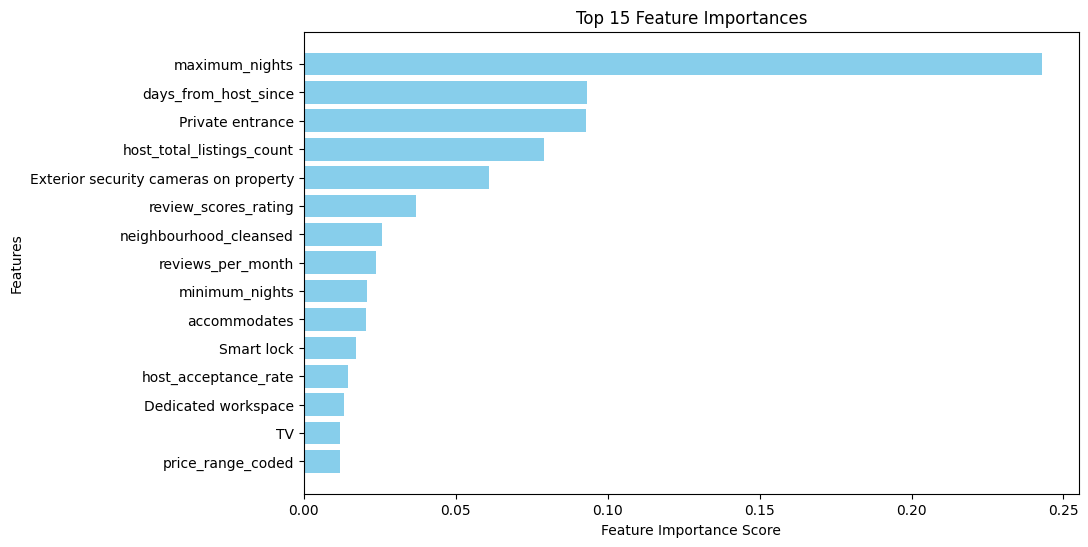

In [16]:
# sort by importance (descending)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# display top features
print(feature_importance_df)

# plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:15], feature_importance_df['Importance'][:15], color='skyblue')
plt.gca().invert_yaxis()  # Invert axis to show highest at top
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 15 Feature Importances")
plt.show()